### import pandas as pd
import numpy as np
import matplotlib.pylab as plt


In [13]:
df=pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")



/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
df.head(5)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [15]:
missing_data = df.isnull()
missing_data.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


In [16]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

In [17]:
df.drop(["PEDROWNOTGRNT","INTKEY","SDOTCOLNUM","SPEEDING"], axis=1)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,LOCATION,...,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,5TH AVE NE AND NE 103RD ST,...,NaN,N,Overcast,Wet,Daylight,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,NaN,0,Raining,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,...,NaN,0,Overcast,Dry,Daylight,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,...,NaN,N,Clear,Dry,Daylight,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,...,NaN,0,Raining,Wet,Daylight,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,34TH AVE S BETWEEN S DAKOTA ST AND S GENESEE ST,...,NaN,N,Clear,Dry,Daylight,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,AURORA AVE N BETWEEN N 85TH ST AND N 86TH ST,...,Y,N,Raining,Wet,Daylight,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,20TH AVE NE AND NE 75TH ST,...,NaN,N,Clear,Dry,Daylight,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,GREENWOOD AVE N AND N 68TH ST,...,NaN,N,Clear,Dry,Dusk,5,Vehicle Strikes Pedalcyclist,4308,0,N


In [18]:
df.drop(["SEGLANEKEY","CROSSWALKKEY","HITPARKEDCAR","INATTENTIONIND","STATUS"], axis=1)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,ADDRTYPE,INTKEY,LOCATION,...,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC
0,2,-122.323148,47.703140,1,1307,1307,3502005,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle
1,1,-122.347294,47.647172,2,52200,52200,2607959,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...
2,1,-122.334540,47.607871,3,26700,26700,1482393,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving
3,1,-122.334803,47.604803,4,1144,1144,3503937,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others
4,2,-122.306426,47.545739,5,17700,17700,1807429,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Block,NaN,34TH AVE S BETWEEN S DAKOTA ST AND S GENESEE ST,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Block,NaN,AURORA AVE N BETWEEN N 85TH ST AND N 86TH ST,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",N,Raining,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Intersection,24760.0,20TH AVE NE AND NE 75TH ST,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Intersection,24349.0,GREENWOOD AVE N AND N 68TH ST,...,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,N,Clear,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist


In [19]:
import pylab as pl
%matplotlib inline

In [20]:
df["ADDRTYPE"].replace("Intersection", "1",inplace=True)
df["ADDRTYPE"].replace("Block", "2",inplace=True)
df["ADDRTYPE"].replace("Alley", "3",inplace=True)


### df["WEATHER"].replace("Clear", "1",inplace=True)
df["WEATHER"].replace("Overcast", "2",inplace=True)
df["WEATHER"].replace("Raining", "3" ,inplace=True)
df["WEATHER"].replace("Unknown", "4",inplace=True)
df["WEATHER"].replace("Other", "5",inplace=True)
df["WEATHER"].replace("Snowing", "6",inplace=True)
df["WEATHER"].replace("Fog/Smog/Smoke", "7",inplace=True)
df["WEATHER"].replace("Sleet/Hail/Freezing Rain", "8",inplace=True)
df["WEATHER"].replace("Blowing Sand/Dirt", "9",inplace=True)
df["WEATHER"].replace("Severe Crosswind", "10",inplace=True)
df["WEATHER"].replace("Partly Cloudy", "11",inplace=True)


In [22]:
df["SEVERITYCODE"].replace("2b", "3",inplace=True)
df["SEVERITYCODE"].replace("3", "4",inplace=True)


In [23]:
df["ROADCOND"].replace("Dry", "1",inplace=True)
df["ROADCOND"].replace("Wet", "2",inplace=True)
df["ROADCOND"].replace("Unknown", "3",inplace=True)
df["ROADCOND"].replace("Snow/Slush", "4",inplace=True)
df["ROADCOND"].replace("Ice", "5",inplace=True)
df["ROADCOND"].replace("Other", "6",inplace=True)
df["ROADCOND"].replace("Sand/Mud/Dirt", "7",inplace=True)
df["ROADCOND"].replace("Standing Water", "8",inplace=True)
df["ROADCOND"].replace("Oil", "9",inplace=True)



In [24]:
df.dropna(subset=["ROADCOND"], axis=0,inplace=True)
df.dropna(subset=["WEATHER"], axis=0,inplace=True)
df.dropna(subset=["ADDRTYPE"], axis=0,inplace=True)


In [25]:
df[["SEVERITYCODE"]]=df[["SEVERITYCODE"]].astype("int")
df[["ADDRTYPE"]]=df[["ADDRTYPE"]].astype("int")
df[["WEATHER"]]=df[["WEATHER"]].astype("int")
df[["ROADCOND"]]=df[["ROADCOND"]].astype("int")


In [26]:
cdf = df[['SEVERITYCODE','ADDRTYPE','WEATHER','ROADCOND']]
cdf.head(9)


,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND
0,2,1,2,2
1,1,2,3,2
2,1,2,2,1
3,1,2,1,1
4,2,1,3,2
5,1,1,1,1
6,1,1,3,2
7,2,1,1,1
8,1,2,1,1


We shall first check which type is the most common type of severity of accident

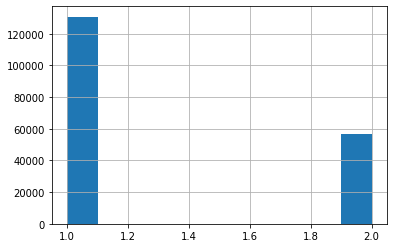

In [27]:
viz=cdf['SEVERITYCODE']
viz.hist()
plt.show()



From the graph it is clear that the code-1 is the most common type of severity.


A code that corresponds to the severity of the
collision:

• 3—fatality

• 2b—serious injury

• 2—injury

• 1—prop damage 

Now we shall find which address type reports the most accidents in the dataset

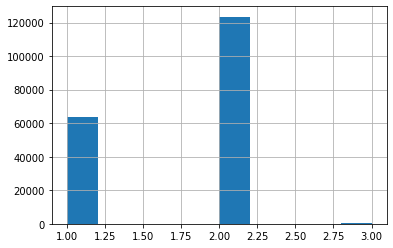

In [28]:
viz=cdf['ADDRTYPE']
viz.hist()
plt.show()

From the above graph it is clear that the most accidents are reported in code 2-Block.
Collision address type:

• Alley-3

• Block-2

• Intersection-1

we shall now plot a scatterplot to determine the relationship between the location and the severity of the accident.


In [29]:
cdf.corr()

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND
SEVERITYCODE,1.000000,-0.199769,-0.090985,-0.098240
ADDRTYPE,-0.199769,1.000000,0.075973,0.093447
WEATHER,-0.090985,0.075973,1.000000,0.712901
ROADCOND,-0.098240,0.093447,0.712901,1.000000


In [30]:
import seaborn as sns

<AxesSubplot:xlabel='ADDRTYPE', ylabel='SEVERITYCODE'>

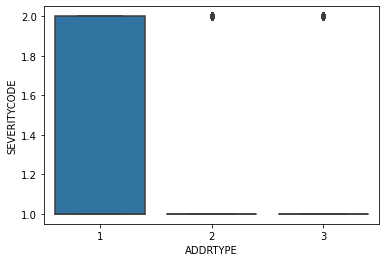

In [31]:
sns.boxplot(x="ADDRTYPE", y="SEVERITYCODE", data=df)


<AxesSubplot:xlabel='ADDRTYPE', ylabel='SEVERITYCODE'>

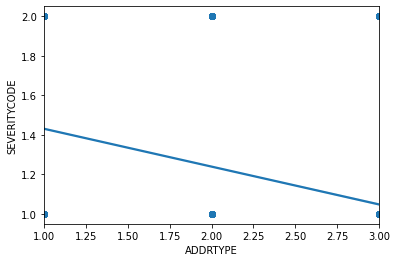

In [32]:
sns.regplot(x="ADDRTYPE", y="SEVERITYCODE", data=df)

From the above graphs it is clear that the most severe accidents take place at addresstype-1 which is "INTERSECTION"

We shall now find the Pearson correlation
Pearson Correlation

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

1: Total positive linear correlation.

0: No linear correlation, the two variables most likely do not affect each other.

-1: Total negative linear correlation.

In [33]:
from scipy import stats

In [34]:
pearson_coef, p_value = stats.pearsonr(df['SEVERITYCODE'], df['ADDRTYPE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.19976858449641707  with a P-value of P = 0.0


From the Pearson correlation coefficient we can deduce that the there is no implicit relationship between the address of the accident and the severity.

We shall now try to deduce a relationship between the Weather and the severity of the accident by plotting the necessary graphs.

<AxesSubplot:xlabel='WEATHER', ylabel='SEVERITYCODE'>

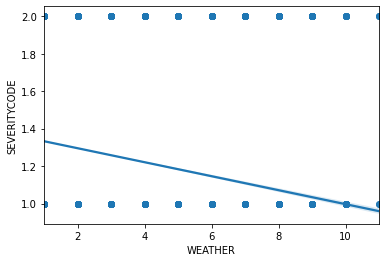

In [35]:
sns.regplot(x="WEATHER", y="SEVERITYCODE", data=df)

<AxesSubplot:xlabel='WEATHER', ylabel='SEVERITYCODE'>

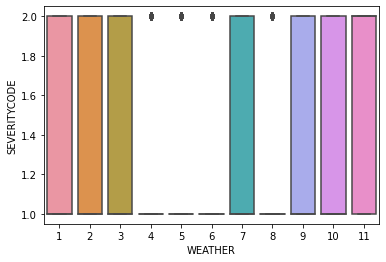

In [36]:
sns.boxplot(x="WEATHER", y="SEVERITYCODE", data=df)

From the above graph we can see that the severity of the accident is usually on the higher side when the weather codes are 1,2,3,7,9,10,11. These codes represent the following

- Clear          1

- Overcast       2

- Raining        3

- Unknown        4

- Other          5

- Snowing        6

- Fog            7

- Hail           8

- Dirt           9

- Severe Crosswinds  10

- Partly Cloudy   11



In [37]:
pearson_coef, p_value = stats.pearsonr(df['WEATHER'], df['SEVERITYCODE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.09098525088875115  with a P-value of P = 0.0


And as the Pearson Coefficient suggests there is no linear correlation between the weather and the severity of the accident.

Finally we shall try to find a relation between the road conditions and the severity of the accidents

<AxesSubplot:xlabel='ROADCOND', ylabel='SEVERITYCODE'>

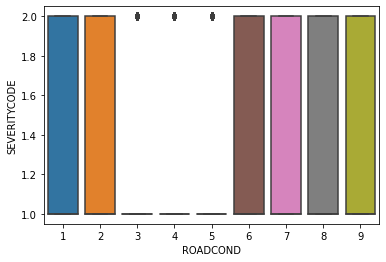

In [38]:
sns.boxplot(x="ROADCOND", y="SEVERITYCODE", data=df)

<AxesSubplot:xlabel='ROADCOND', ylabel='SEVERITYCODE'>

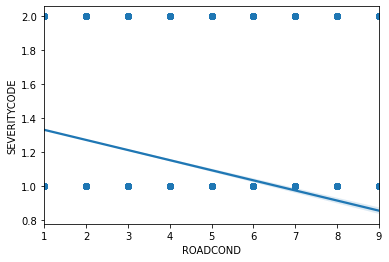

In [39]:
sns.regplot(x="ROADCOND", y="SEVERITYCODE", data=df)

In [40]:
pearson_coef, p_value = stats.pearsonr(df['ROADCOND'], df['SEVERITYCODE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.0982403232196511  with a P-value of P = 0.0


This suggests that there in no linear relationship between the roadconditions and the severity of the accident


In [42]:
from sklearn.preprocessing import StandardScaler
X = cdf.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.38664893,  0.1869792 ,  0.71874459],
       [ 0.69642588,  1.07913667,  0.71874459],
       [ 0.69642588,  0.1869792 , -0.6005069 ],
       ...,
       [-1.38664893, -0.70517828, -0.6005069 ],
       [-1.38664893, -0.70517828, -0.6005069 ],
       [ 0.69642588, -0.70517828,  0.71874459]])

In [77]:
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[3 3 2 ... 0 0 2]


In [78]:
cdf["Clus_km"] = labels
cdf.head(5)

<ipython-input-78-0f188f2a58eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf["Clus_km"] = labels


,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,Clus_km
0,2,1,2,2,3
1,1,2,3,2,3
2,1,2,2,1,2
3,1,2,1,1,2
4,2,1,3,2,3


In [79]:
cdf.groupby('Clus_km').mean()

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND
Clus_km,,,,
0,1.439794,1.000000,1.127187,1.033154
1,1.076670,1.879610,4.321506,2.960905
2,1.258756,2.006077,1.128425,1.037731
3,1.329449,1.629678,2.770873,1.975687
4,1.255846,1.828061,1.568776,5.414030


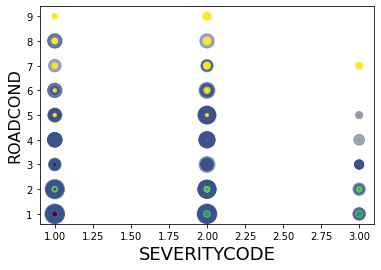

In [86]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:,0], X[:, 2], s=area, c=labels.astype(np.int), alpha=0.5)
plt.xlabel('SEVERITYCODE', fontsize=18)
plt.ylabel('ROADCOND', fontsize=16)

plt.show()


The above scatterplot shows us that most of the type 2 severity collisions take place in road conditions 1-4. These are:
1-DRY
2-WET
3-Unknown
4-SNOW


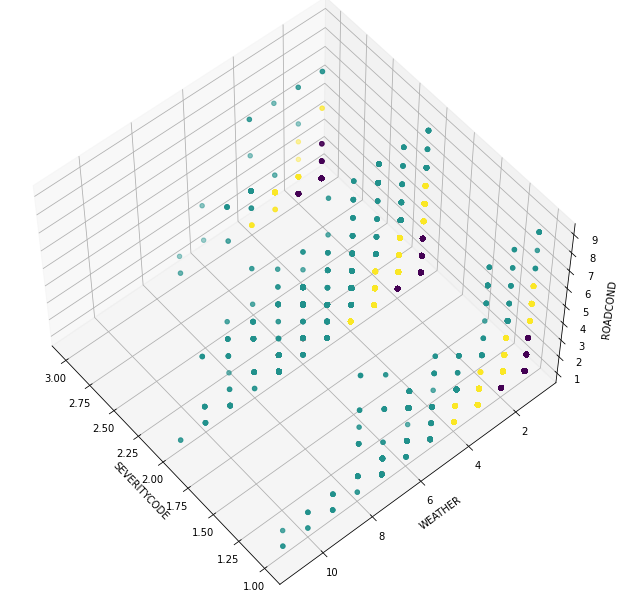

In [62]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(10, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=55, azim=140)

plt.cla()
# plt.ylabel('WEATHER', fontsize=18)
# plt.xlabel('SEVERITYCODE', fontsize=16)
# plt.zlabel('ROADCOND', fontsize=16)
ax.set_xlabel('SEVERITYCODE')
ax.set_ylabel('WEATHER')
ax.set_zlabel('ROADCOND')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c= labels.astype(np.int))


We now have 3 clusters based on the severity of the accident with respect to the roadcondtions and weather.
From the above chart we can see that the majority of the code 2 type collisions take place with the roadconditions 1-4 and weather conditions 1-7, whereas most of the type 1 collisions take place with road conditions 1-3 and weather conditions 1-6.